In [1]:
import logging
logging.root.setLevel(logging.INFO)


In [2]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [3]:
import random

from xcs.scenarios import Scenario
from xcs.bitstrings import BitString

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze


class MazeScenario(Scenario):
    
    def __init__(self, training_cycles=5000, input_size=8):
        self.input_size = input_size
        self.maze = gym.make('Maze5-v0')
        self.possible_actions = (0, 1, 2, 3, 4, 5, 6, 7)
        self.done = False
        self.state = None
        self.reward = 0
        self.state = self.maze.reset()
        self.remaining_cycles = training_cycles
        
        self.steps_array = []
        self.steps = 0

    def reset(self):
        self.done = False
        self.state = self.maze.reset()
        no_reward_state=[]
        for char in self.state:
            if char == '1' or char == '0':
                no_reward_state.append(char)
            else:
                no_reward_state.append('1')
        return no_reward_state
        
    # XCS Hosford42 functions
    @property
    def is_dynamic(self):
        return False
        
    def get_possible_actions(self):
        return self.possible_actions
        
    def more(self):
        if self.done:
            self.reset()
            self.remaining_cycles -= 1
            self.steps_array.append(self.steps)
            self.steps = 0
            self.reset()
        return self.remaining_cycles >=0
        
    def sense(self):
        no_reward_state=[]
        for char in self.state:
            if char == '1' or char == '0':
                no_reward_state.append(char)
            else:
                no_reward_state.append('1')
        return BitString(''.join(no_reward_state))
    
    def execute(self, action):
        self.steps += 1
        raw_state, step_reward, done, _ = self.maze.step(action)
        self.state = raw_state
        self.reward = step_reward
        self.done = done
        return self.reward

    # XCS Pyalcs functions
    def step(self, action):
        raw_state, step_reward, done, _ = self.maze.step(action)
        self.state = raw_state
        self.reward = step_reward
        self.done = done
        no_reward_state=[]
        for char in self.state:
            if char == '1' or char == '0':
                no_reward_state.append(char)
            else:
                no_reward_state.append('1')
        return no_reward_state, self.reward, self.done, _

In [4]:
training_cycles = 1000
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(training_cycles, input_size)

In [5]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 25
algorithm.crossover_probability = 0.5
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = float(np.finfo(np.float32).tiny)        # p_I
algorithm.initial_error = float(np.finfo(np.float32).tiny)            # epsilon_I
algorithm.initial_fitness = float(np.finfo(np.float32).tiny)           # F_I
algorithm.minimum_actions = 8
algorithm.wildcard_probability = 0.33

In [6]:
model = algorithm.new_model(scenario)
model.run(scenario, learn=True)


In [7]:
print(model)


######## => 0
    Time Stamp: 38575
    Average Reward: 0.37571021261363624
    Error: 2.329403318204546
    Fitness: 0.0012771595077374358
    Experience: 82
    Action Set Size: 18.08588594887638
    Numerosity: 1
00####00 => 2
    Time Stamp: 38142
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.020077409540929916
    Experience: 0
    Action Set Size: 1
    Numerosity: 1
#1###1#0 => 2
    Time Stamp: 38388
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.045376778458758114
    Experience: 2
    Action Set Size: 14.0
    Numerosity: 1
#00##### => 2
    Time Stamp: 38420
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.04831281665249265
    Experience: 0
    Action Set Size: 1
    Numerosity: 1
#0####00 => 2
    Time Stamp: 38354
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.05477763541277623
    Experience: 4
    Action Set Size: 16.25
    Numerosity: 1
#######1 => 5
    Time Stamp: 38512
    Average Reward: 0.0
    Error: 0.0
    Fitness: 0.05779658831931664

In [8]:
print(len(model))

39


In [9]:
for rule in model:
    if rule.fitness > .05 and rule.experience >= 1:
        print(rule.condition, '=>', rule.action, ' [%.5f]' % rule.fitness)

######## => 5  [0.93766]
######## => 7  [0.99387]
######## => 3  [0.98599]
######## => 4  [0.89229]
######## => 1  [0.99630]
######## => 6  [0.95629]
######## => 2  [0.08427]
#######1 => 0  [0.47858]
#######1 => 4  [0.10565]
#######1 => 5  [0.05780]
#0###### => 2  [0.70505]
#00#00## => 0  [0.72414]
#1#####0 => 2  [0.40239]
######00 => 0  [0.43793]
#10##### => 2  [0.61617]
#11##010 => 0  [0.39836]
###0#### => 0  [0.32995]
0##10001 => 2  [0.66394]
#111#010 => 0  [0.48421]
#####1## => 0  [0.32151]
1####### => 6  [0.06619]
1####### => 7  [0.09550]
1####### => 3  [0.09507]
1##01101 => 2  [0.69134]
#######0 => 2  [0.47853]
###1#### => 4  [0.08260]
##0##### => 2  [0.29018]
##0##### => 4  [0.08970]
#0####00 => 2  [0.05478]
#10##0## => 2  [0.07788]
0##1000# => 2  [0.09964]
###0###1 => 0  [0.13767]
#01##### => 2  [0.08614]
#100#### => 2  [0.06815]
#####0## => 5  [0.08743]


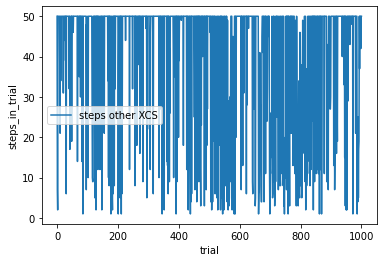

In [10]:
import pandas as pd

df = pd.DataFrame(scenario.steps_array)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

In [11]:
from lcs.agents.xcs import XCS, Configuration

cfg = Configuration(number_of_actions=algorithm.minimum_actions,
                    covering_wildcard_chance=1-algorithm.wildcard_probability)
                    


In [12]:
agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(scenario, training_cycles, False)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [8.53719943350225e-09, 1.8442453025562415e-08, 1.319404340407088e-08, 2.2664404308493155e-08, 1.4908241538230018e-08, 8.982408068035901e-09, 2.7684581271275094e-08, 2.0375159104558157e-08], 'perf_time': 0.028630417000385933}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 50, 'reward': [34.36346062489276, 34.63300194918697, 27.31210728043027, 35.020699445355866, 33.811886737952946, 35.2579007844482, 29.68979785647382, 31.271719439510314], 'perf_time': 0.02399798299302347}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 50, 'reward': [59.07287502145834, 59.02354518946073, 56.34594469293716, 56.69713390680292, 60.11027818341582, 58.862021488304734, 52.342963153730686, 57.01518959594554], 'perf_time': 0.04025520100549329}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 50, 'reward': [24.16169046261253, 21.874793072264627, 70.74385397135241, 21.673993044301483, 24.638060131299344, 18.14046481742258, 22.

In [13]:
for rule in explore_population:
    print(rule)


Cond:11##0111 - Act:3 - Num:1 [fit: 0.070, exp: 2.00, pred: 156.215]
Cond:#11##11# - Act:1 - Num:1 [fit: 0.039, exp: 8.00, pred: 150.209]
Cond:100#1011 - Act:4 - Num:2 [fit: 0.069, exp: 11.00, pred: 135.360]
Cond:#0##0#1# - Act:7 - Num:2 [fit: 0.088, exp: 10.00, pred: 138.533]
Cond:#1110#01 - Act:3 - Num:1 [fit: 0.120, exp: 2.00, pred: 125.072]
Cond:010##11# - Act:1 - Num:1 [fit: 0.181, exp: 3.00, pred: 148.108]
Cond:#0##0101 - Act:6 - Num:3 [fit: 0.041, exp: 3.00, pred: 139.931]
Cond:#0##1101 - Act:1 - Num:2 [fit: 0.136, exp: 3.00, pred: 130.907]
Cond:1##111#0 - Act:2 - Num:3 [fit: 0.148, exp: 19.00, pred: 132.051]
Cond:100#0101 - Act:1 - Num:1 [fit: 0.095, exp: 2.00, pred: 150.491]
Cond:0011#101 - Act:1 - Num:3 [fit: 0.036, exp: 4.00, pred: 114.361]
Cond:00#00000 - Act:5 - Num:1 [fit: 0.050, exp: 1.00, pred: 149.138]
Cond:0111#001 - Act:7 - Num:2 [fit: 0.288, exp: 5.00, pred: 122.981]
Cond:0##10001 - Act:2 - Num:1 [fit: 0.498, exp: 10.00, pred: 133.522]
Cond:0#1#001# - Act:1 - Num:1 

In [14]:
print(len(explore_population))

132


In [15]:
for rule in explore_population:
    if rule.fitness >= .05 and rule.experience >= 1:
        print(rule.condition, '=>', rule.action, ' [%.5f]' % rule.fitness)

11##0111 => 3  [0.07000]
100#1011 => 4  [0.06909]
#0##0#1# => 7  [0.08753]
#1110#01 => 3  [0.12000]
010##11# => 1  [0.18050]
#0##1101 => 1  [0.13550]
1##111#0 => 2  [0.14818]
100#0101 => 1  [0.09500]
00#00000 => 5  [0.05000]
0111#001 => 7  [0.28848]
0##10001 => 2  [0.49789]
0#1#001# => 1  [0.05000]
#####010 => 2  [0.23541]
00##1### => 5  [0.05000]
01#1#00# => 5  [0.07250]
1#0#1##0 => 3  [0.19702]
0##11101 => 3  [0.16050]
101####0 => 6  [0.15695]
11##1001 => 0  [0.08550]
000#1000 => 0  [0.05000]
##10#1## => 1  [0.11360]
001#0#11 => 7  [0.06500]
0#0##10# => 0  [0.09500]
01101### => 1  [0.09500]
#0100### => 5  [0.17467]
1000#1#1 => 2  [0.09500]
111#0010 => 1  [0.15581]
##110#01 => 0  [0.47364]
0#111000 => 0  [0.36407]
#1##010# => 1  [0.12000]
##001010 => 6  [0.09500]
###11##1 => 2  [0.08550]
#0##110# => 5  [0.10025]
#0#01011 => 1  [0.05000]
0010###1 => 2  [0.09500]
0#11100# => 1  [0.18300]
11#01100 => 4  [0.09500]
1#1100## => 6  [0.05000]
01#1#1## => 5  [0.05000]
#101111# => 6  [0.05000]


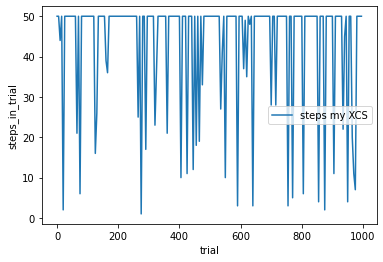

In [16]:
import pandas as pd

df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
df['trial'] = df.index * cfg.metrics_trial_frequency
df.set_index('trial', inplace=True)

ax = df.plot()
ax.set_xlabel("trial") 
ax.set_ylabel("steps_in_trial")
ax.legend(["steps my XCS"])

#### Conclusions
After code review of both classifiers and Algorithmic Description of XCS I found that implementation of Generate Match Set of Hosford42 creates only one classifier if match_set lenght is lower than theta_mna. 
<br />
Meanwhile in my implementation and Algorithmic Description of XCS the Generate Match Set creates multiple covering classifiers until match set is equal to theta_mna.